# Predicting Sleep Efficiency

## Introduction 

Sleep is extremely important for maintaining good health, as important as healthy diet and consistent exercise. Insufficient sleep can lead to serious medical conditions such as cardiovascular disease, diabetes, obesity and dementia. (source) However, a good sleep is not how many hours spent in bed; therefore, the model will be predicting sleep efficiency, rather than sleep duration.

## Dataset
Introduce all the variables in the data set:
- **Age** : age of individual
- **Gender** : male / female
- **Bedtime** : time individual goes to bed each night
- **Wakeup time** : time individual wakes up each morning
- **sleep duration** : total amount of time slept
- **REM** : percentage of time spent in REM
- **deep_sleep** : percent of time spent in deep sleep
- **light_sleep** : percent of time spent in light sleep
- **awakenings** : number of times individual wakes up at night
- **caffeine consumption** : amount of caffeine consumed in mg 24 hours prior to bed time
- **alcohol consumption** : amount of alcohol in Oz. consumed 24 hours prior to bed time
- **smoke** : whether individual smokes 
- **exercise** : number of times exercised weekly




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Lasso
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
sleep = pd.read_csv("Sleep_Efficiency.csv")

In [9]:
#sleep.head()

In [10]:
#rename columns
sleep =  sleep.rename(columns={'Wakeup time': 'wakeup_time', 'Sleep duration': 'sleep_duration', 
                               'Sleep efficiency' : 'sleep_efficiency', 'REM sleep percentage' : 'REM',
                               'Deep sleep percentage' : 'deep_sleep', 'Light sleep percentage' : 'light_sleep',
                               'Caffeine consumption' : 'caffeine_intake', 'Alcohol consumption' : 'alcohol_intake',
                               'Smoking status' : 'smoke', 'Exercise frequency' : 'exercise'})

In [13]:

sleep.head()

,ID,Age,Gender,Bedtime,wakeup_time,sleep_duration,sleep_efficiency,REM,deep_sleep,light_sleep,Awakenings,caffeine_intake,alcohol_intake,smoke,exercise
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [12]:
#select variables

sleep1 = sleep[['Age','Gender','Bedtime','wakeup_time','REM', 'deep_sleep','light_sleep','sleep_duration', 'sleep_efficiency','Awakenings', 'caffeine_intake', 'alcohol_intake', 'smoke', 'exercise']]

In [207]:
sleep2 = sleep1.dropna()

In [208]:
sleep2.head()

,Age,Gender,Bedtime,wakeup_time,REM,deep_sleep,light_sleep,sleep_duration,sleep_efficiency,Awakenings,caffeine_intake,alcohol_intake,smoke,exercise
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,18,70,12,6.0,0.88,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,19,28,53,7.0,0.66,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,20,70,10,8.0,0.89,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,23,25,52,6.0,0.51,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,27,55,18,8.0,0.76,3.0,0.0,3.0,No,3.0


In [224]:
def hour(x):
    time_only = x.split()[1]
    time_arr = time_only.split(':')
    return int(time_arr[0])

def min(x):
    time_only = x.split()[1]
    time_arr = time_only.split(':')
    if time_arr[1] == "30":
        return 0.5
    else:
        return 0

sleep2['bedtime_hr'] = sleep2.apply(lambda row: hour(row.Bedtime), axis=1)
sleep2['bedtime_min'] = sleep2.apply(lambda row: min(row.Bedtime), axis=1)
sleep2['wakeup_hr'] = sleep2.apply(lambda row: hour(row.wakeup_time), axis=1)
sleep2['wakeup_min'] = sleep2.apply(lambda row: min(row.wakeup_time), axis=1)

sleep2['bedtime2'] = sleep2['bedtime_min']+sleep2['bedtime_hr'] 
sleep2['wakeup2'] = sleep2['wakeup_min']+sleep2['wakeup_hr'] 

sleep2['gender2'] = sleep2['Gender'].apply(lambda x:1 if x == 'Male' else 0)
sleep2['smoking'] = sleep2['smoke'].apply(lambda x:1 if x == 'Yes' else 0)


sleep2.head()

,Age,Gender,Bedtime,wakeup_time,REM,deep_sleep,light_sleep,sleep_duration,sleep_efficiency,Awakenings,...,smoke,exercise,bedtime_hr,bedtime_min,wakeup_hr,wakeup_min,bedtime2,wakeup2,gender2,smoking
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,18,70,12,6.0,0.88,0.0,...,Yes,3.0,1,0.0,7,0.0,1.0,7.0,0,1
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,19,28,53,7.0,0.66,3.0,...,Yes,3.0,2,0.0,9,0.0,2.0,9.0,1,1
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,20,70,10,8.0,0.89,1.0,...,No,3.0,21,0.5,5,0.5,21.5,5.5,0,0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,23,25,52,6.0,0.51,3.0,...,Yes,1.0,2,0.5,8,0.5,2.5,8.5,0,1
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,27,55,18,8.0,0.76,3.0,...,No,3.0,1,0.0,9,0.0,1.0,9.0,1,0


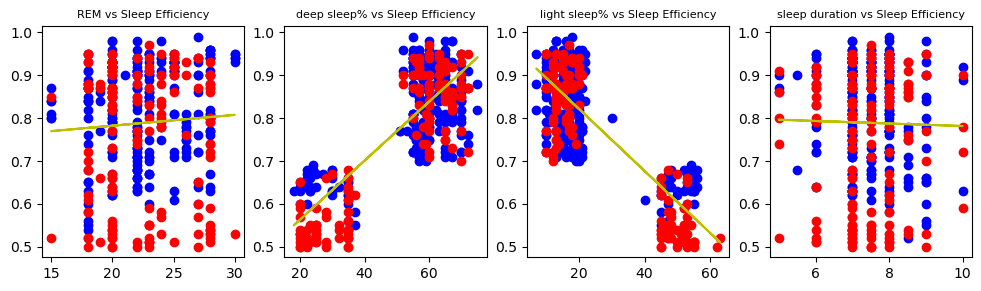

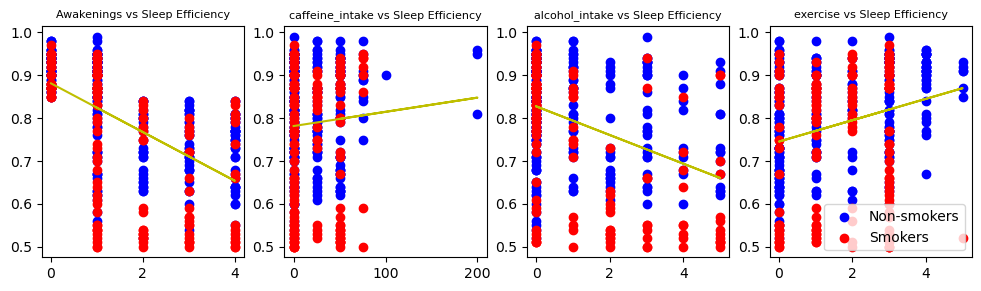

In [210]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
fig, axs1 = plt.subplots(1, 4, figsize=(12, 3))

sleepplots = [sleep2["REM"],sleep2["deep_sleep"],sleep2["light_sleep"],sleep2["sleep_duration"]]
sleepplots2 = [sleep2["Awakenings"],sleep2["caffeine_intake"],sleep2["alcohol_intake"],sleep2["exercise"]]
             
list1 = ["REM", "deep_sleep", "light_sleep", "sleep_duration"]
list2  = ["Awakenings", "caffeine_intake", "alcohol_intake", "exercise"]

for i in range(0,4):
    axs[i].scatter(non_smokers[list1[i]], non_smokers["sleep_efficiency"], color="blue", label = "Non-smokers")
    axs[i].scatter(smokers[list1[i]], smokers['sleep_efficiency'], color='red', label='Smokers')
    m, b = np.polyfit(sleepplots[i], sleep2["sleep_efficiency"], 1)
    axs[i].plot(sleepplots[i], m*sleepplots[i]+b, 'y')
    
for i in range(0,4):
    axs1[i].scatter(non_smokers[list2[i]], non_smokers["sleep_efficiency"], color="blue", label = "Non-smokers")
    axs1[i].scatter(smokers[list2[i]], smokers['sleep_efficiency'], color='red', label='Smokers')
    m, b = np.polyfit(sleepplots2[i], sleep2["sleep_efficiency"], 1)
    axs1[i].plot(sleepplots2[i], m*sleepplots2[i]+b, 'y')


smokers = sleep2[sleep2['smoke'] == 'Yes']
non_smokers = sleep2[sleep2['smoke'] == 'No']


axs[0].set_title("REM vs Sleep Efficiency",fontdict={'fontsize': 8})
axs[1].set_title("deep sleep% vs Sleep Efficiency", fontdict={'fontsize': 8})
axs[2].set_title("light sleep% vs Sleep Efficiency", fontdict={'fontsize': 8})
axs[3].set_title("sleep duration vs Sleep Efficiency", fontdict={'fontsize': 8})


axs1[0].set_title("Awakenings vs Sleep Efficiency",fontdict={'fontsize': 8})
axs1[1].set_title("caffeine_intake vs Sleep Efficiency", fontdict={'fontsize': 8})
axs1[2].set_title("alcohol_intake vs Sleep Efficiency", fontdict={'fontsize': 8})
axs1[3].set_title("exercise vs Sleep Efficiency", fontdict={'fontsize': 8})

plt.legend()
plt.show()

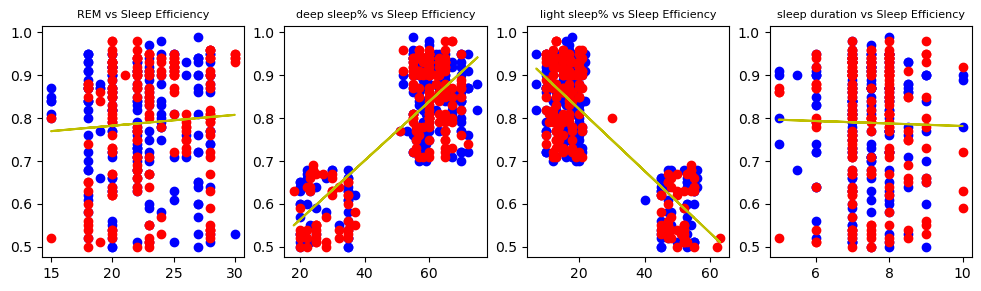

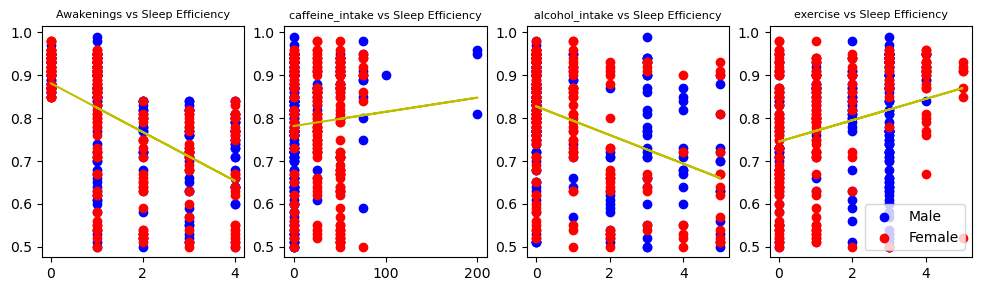

In [211]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
fig, axs1 = plt.subplots(1, 4, figsize=(12, 3))

sleepplots = [sleep2["REM"],sleep2["deep_sleep"],sleep2["light_sleep"],sleep2["sleep_duration"]]
sleepplots2 = [sleep2["Awakenings"],sleep2["caffeine_intake"],sleep2["alcohol_intake"],sleep2["exercise"]]
             
list1 = ["REM", "deep_sleep", "light_sleep", "sleep_duration"]
list2  = ["Awakenings", "caffeine_intake", "alcohol_intake", "exercise"]

female = sleep2[sleep2['Gender'] == 'Female']
male = sleep2[sleep2['Gender'] == 'Male']

for i in range(0,4):
    axs[i].scatter(male[list1[i]], male["sleep_efficiency"], color="blue", label = "Male")
    axs[i].scatter(female[list1[i]], female['sleep_efficiency'], color='red', label='Female')
    m, b = np.polyfit(sleepplots[i], sleep2["sleep_efficiency"], 1)
    axs[i].plot(sleepplots[i], m*sleepplots[i]+b, 'y')
    
for i in range(0,4):
    axs1[i].scatter(male[list2[i]], male["sleep_efficiency"], color="blue", label = "Male")
    axs1[i].scatter(female[list2[i]], female['sleep_efficiency'], color='red', label='Female')
    m, b = np.polyfit(sleepplots2[i], sleep2["sleep_efficiency"], 1)
    axs1[i].plot(sleepplots2[i], m*sleepplots2[i]+b, 'y')


female = sleep2[sleep2['Gender'] == 'Female']
male = sleep2[sleep2['Gender'] == 'Male']


axs[0].set_title("REM vs Sleep Efficiency",fontdict={'fontsize': 8})
axs[1].set_title("deep sleep% vs Sleep Efficiency", fontdict={'fontsize': 8})
axs[2].set_title("light sleep% vs Sleep Efficiency", fontdict={'fontsize': 8})
axs[3].set_title("sleep duration vs Sleep Efficiency", fontdict={'fontsize': 8})


axs1[0].set_title("Awakenings vs Sleep Efficiency",fontdict={'fontsize': 8})
axs1[1].set_title("caffeine_intake vs Sleep Efficiency", fontdict={'fontsize': 8})
axs1[2].set_title("alcohol_intake vs Sleep Efficiency", fontdict={'fontsize': 8})
axs1[3].set_title("exercise vs Sleep Efficiency", fontdict={'fontsize': 8})

plt.legend()
plt.show()

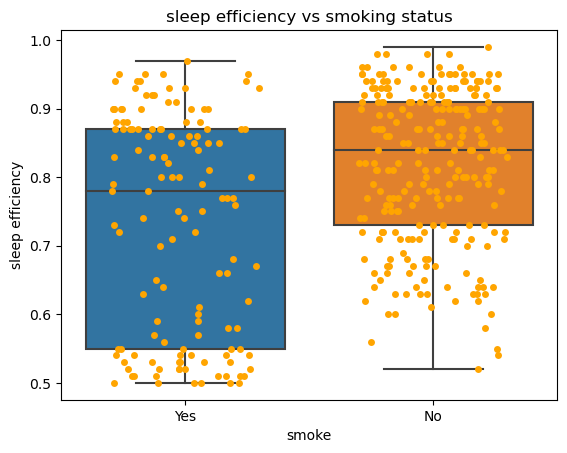

In [212]:
sns.boxplot(y="sleep_efficiency", x="smoke", data = sleep2)
sns.stripplot(x='smoke', y='sleep_efficiency', data=sleep2, color="orange", jitter=0.3, size=5)

plt.ylabel("sleep efficiency")
plt.title("sleep efficiency vs smoking status")
plt.show()

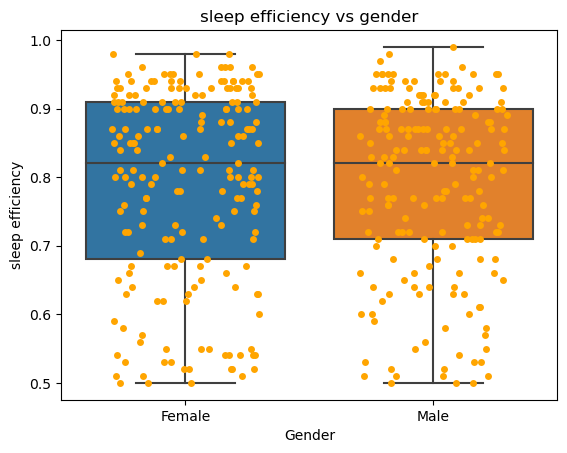

In [213]:
sns.boxplot(y="sleep_efficiency", x="Gender", data = sleep2)
sns.stripplot(x='Gender', y='sleep_efficiency', data=sleep2, color="orange", jitter=0.3, size=5)

plt.ylabel("sleep efficiency")
plt.title("sleep efficiency vs gender")
plt.show()

## Modelling

In [214]:
X = sleep2[['Age', 'sleep_duration','Awakenings','caffeine_intake', 
            'alcohol_intake', 'exercise','bedtime2','wakeup2','gender2',
            'smoking','REM','deep_sleep','light_sleep']]
y = sleep2[['sleep_efficiency']]

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [216]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
est = sm.OLS(y_train, X_constant)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       sleep_efficiency   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     91.92
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.92e-86
Time:                        02:19:42   Log-Likelihood:                 378.73
No. Observations:                 271   AIC:                            -731.5
Df Residuals:                     258   BIC:                            -684.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002   1.11e-05     

drop caffeine, sleep duration, exercise, bedtime, wakeup time, gender, for p-vale > 0.05

In [217]:
X_train2 = X_train[['Age','Awakenings','alcohol_intake','smoking',
            'REM','deep_sleep','light_sleep']]
X_test2 = X_test[['Age','Awakenings','alcohol_intake','smoking',
            'REM','deep_sleep','light_sleep']]

In [218]:
X_constant2 = sm.add_constant(X_train2)
est = sm.OLS(y_train, X_constant2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       sleep_efficiency   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.22e-88
Time:                        02:19:42   Log-Likelihood:                 370.06
No. Observations:                 271   AIC:                            -726.1
Df Residuals:                     264   BIC:                            -700.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002   5.54e-06     42.

In [226]:
lm = linear_model.LinearRegression()


a = lm.fit(X_train, y_train)

predicted_train = lm.predict(X_train)
predicted = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train,predicted_train))
rmse_train


0.0598162352033438

Text(0, 0.5, 'True ')

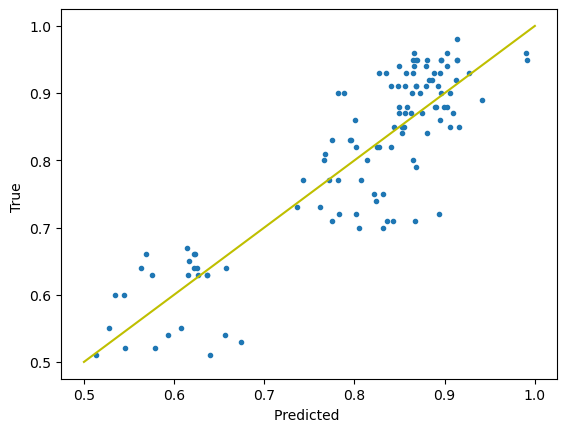

In [227]:
plt.plot(predicted, y_test, '.')
plt.plot([0.5, 1], [0.5,1], 'y')
plt.xlabel("Predicted ")
plt.ylabel("True ")

In [232]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predict_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(predict_rf,y_test))
rmse_rf

0.04690921856442274

Text(0, 0.5, 'True ')

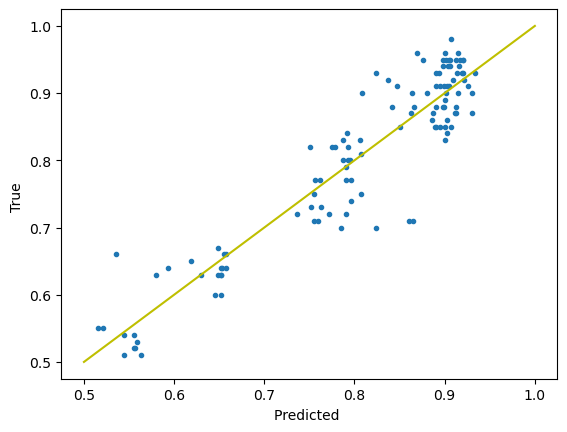

In [233]:
plt.plot(predict_rf, y_test, '.')
plt.plot([0.5, 1], [0.5,1], 'y')
plt.xlabel("Predicted ")
plt.ylabel("True ")

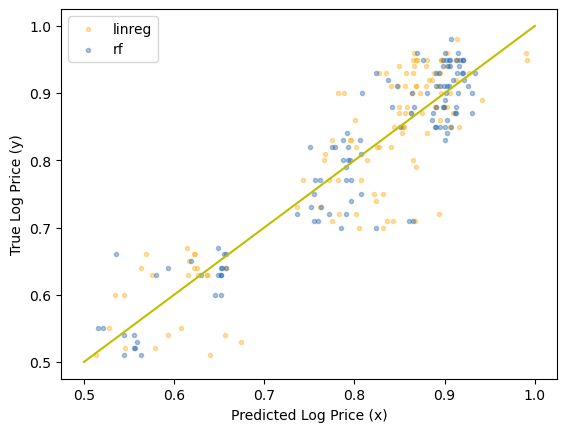

In [234]:
plt.scatter(predicted,y_test, c= '#FFA500', alpha=0.35, s=9)
plt.scatter(predict_rf,y_test, c= '#165aa7', alpha=0.35, s=9)

plt.plot([0.5, 1], [0.5,1], 'y')
plt.legend(["linreg", "rf"])
plt.xlabel("Predicted Log Price (x)")
plt.ylabel("True Log Price (y)")
plt.show()

### References

https://newsinhealth.nih.gov/2021/04/good-sleep-good-health#:~:text=Good%20sleep%20improves%20your%20brain,stroke%20to%20obesity%20and%20dementia.
